In [82]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
# Importing datasets 
features = pd.read_csv("C:/Users/davpi/OneDrive/Desktop/Education/4 Università magistrale/CBS/CBS Corsi/Semester 3/3 - Applied Machine Learning and Data Engineering in Business Context/Assignment 2/Features data set.csv")
sales = pd.read_csv("C:/Users/davpi/OneDrive/Desktop/Education/4 Università magistrale/CBS/CBS Corsi/Semester 3/3 - Applied Machine Learning and Data Engineering in Business Context/Assignment 2/sales data-set.csv")
stores = pd.read_csv("C:/Users/davpi/OneDrive/Desktop/Education/4 Università magistrale/CBS/CBS Corsi/Semester 3/3 - Applied Machine Learning and Data Engineering in Business Context/Assignment 2/stores data-set.csv")

In [84]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

In [85]:
# Dropping unnecessary columns
sales.drop(columns=['Dept'], inplace=True)

In [86]:
# Forwoard fill impution for 'CPI' and 'Unemployment'
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [87]:
features['Week'] = features.Date.dt.week

C:\Users\davpi\AppData\Local\Temp\ipykernel_36704\2978714185.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  features['Week'] = features.Date.dt.week


In [88]:
# Imputing Markdown columns
# Impute NaN values based on weekly average
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_columns:
    weekly_avg = features.groupby('Week')[col].transform('mean')
    features[col].fillna(weekly_avg, inplace=True)

# can't impute all values for MarkDown2 , dropping Markdown2.

features.drop('MarkDown2', axis = 1, inplace=True)
features.drop('Week', axis=1, inplace=True)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,False


In [89]:
# Encoding 'IsHoliday' & 'Type'
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])

In [90]:
# Merging the data
tmp_df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(stores, tmp_df, on=['Store'], how='left')
df.head()

,Store,Type,Size,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,2010-02-05,24924.50,0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106
1,1,0,151315,2010-02-12,46039.49,1,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106
2,1,0,151315,2010-02-19,41595.55,0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106
3,1,0,151315,2010-02-26,19403.54,0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106
4,1,0,151315,2010-03-05,21827.90,0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106


In [91]:
df_date = df.groupby('Date').agg({'Temperature': 'mean',
                                       'Fuel_Price': 'mean',
                                       'CPI': 'mean',
                                       'Unemployment': 'mean', 
                                       'Weekly_Sales': 'mean',
                                       'IsHoliday': 'min',
                                       'MarkDown1': 'mean',
                                       'MarkDown3': 'mean',
                                       'MarkDown4': 'mean',
                                       'MarkDown5': 'mean'}).reset_index()
df_date.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,IsHoliday,MarkDown1,MarkDown3,MarkDown4,MarkDown5
0,2010-02-05,33.277942,2.717869,167.398405,8.576731,16836.121997,0,24089.612333,198.031818,24865.942619,4185.380333
1,2010-02-12,33.361810,2.696102,167.384138,8.567309,16352.056032,1,29880.900556,197.092500,20305.431829,5089.147556
2,2010-02-19,37.038310,2.673666,167.338966,8.576351,16216.658979,0,12536.748111,59.385610,7038.310625,5646.276000
3,2010-02-26,38.629563,2.685642,167.691019,8.561375,14899.549688,0,8504.312444,25.995714,2879.735679,4458.685000
4,2010-03-05,42.373998,2.731816,167.727351,8.572689,15921.015727,0,11293.039000,22.353662,6312.144304,2911.005778


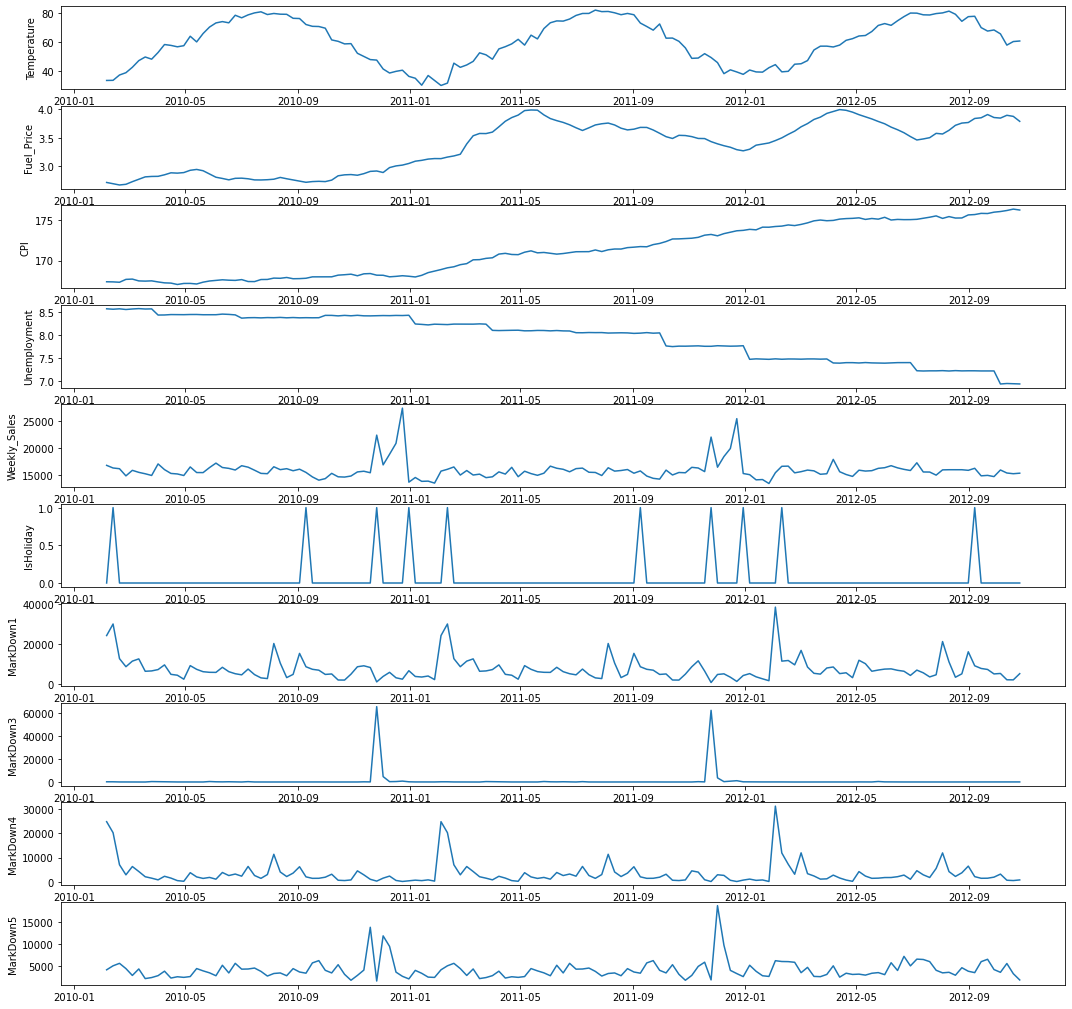

In [92]:
# Plotting all features
fig = plt.figure(figsize = (18, 18))
count_columns_ex_date = len(df_date.columns[1:])
for idx, col in enumerate(df_date.columns[1:]):
    plt.subplot(count_columns_ex_date, 1, idx+1)
    plt.plot(df_date["Date"], df_date[col])
    plt.ylabel(col)

GROUPING

In [135]:
df["Date"][421550:]

421550   2012-06-15
421551   2012-06-22
421552   2012-06-29
421553   2012-07-06
421554   2012-07-13
421555   2012-07-20
421556   2012-07-27
421557   2012-08-03
421558   2012-08-10
421559   2012-08-17
421560   2012-08-24
421561   2012-08-31
421562   2012-09-07
421563   2012-09-14
421564   2012-09-21
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

In [138]:
aggregated_df = df.groupby(['Store', 'Date']).agg({
    'Type': 'mean',
    'Size': 'mean',
    'Weekly_Sales': 'sum',  # Sum the weekly sales for each store and week
    'IsHoliday': 'mean',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'MarkDown1': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

In [140]:
aggregated_df["Relative Sales"] = aggregated_df["Weekly_Sales"] / aggregated_df["Size"]

In [141]:
aggregated_df.head()

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
0,1,2010-02-05,0.0,151315.0,1643690.90,0.0,42.31,2.572,24089.612333,198.031818,24865.942619,4185.380333,211.096358,8.106,10.862710
1,1,2010-02-12,0.0,151315.0,1641957.44,1.0,38.51,2.548,29880.900556,197.092500,20305.431829,5089.147556,211.242170,8.106,10.851254
2,1,2010-02-19,0.0,151315.0,1611968.17,0.0,39.93,2.514,12536.748111,59.385610,7038.310625,5646.276000,211.289143,8.106,10.653063
3,1,2010-02-26,0.0,151315.0,1409727.59,0.0,46.63,2.561,8504.312444,25.995714,2879.735679,4458.685000,211.319643,8.106,9.316509
4,1,2010-03-05,0.0,151315.0,1554806.68,0.0,46.50,2.625,11293.039000,22.353662,6312.144304,2911.005778,211.350143,8.106,10.275298


In [142]:
#find top 5 stores of last 3 months 
filtered_df = aggregated_df[(aggregated_df["Date"]>= "2012-08-03") &(aggregated_df["Date"]<="2012-10-26")]

#group by store and sum up relative sales
store_sales_sum = filtered_df.groupby('Store')['Relative Sales'].sum().reset_index()

# Sort the stores by the sum of "Relative Sales" in descending order and get the top 5 stores
top_5_stores = store_sales_sum.nlargest(5, 'Relative Sales')

In [143]:
filtered_df

,Store,Date,Type,Size,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Relative Sales
130,1,2012-08-03,0.0,151315.0,1631135.79,0.0,86.11,3.417,27584.78,30.23,12007.04,4661.71,221.949864,6.908,10.779736
131,1,2012-08-10,0.0,151315.0,1592409.97,0.0,85.05,3.494,11436.22,6.85,6964.26,4836.22,221.958433,6.908,10.523808
132,1,2012-08-17,0.0,151315.0,1597868.05,0.0,84.85,3.571,3662.06,4.84,2752.20,3446.15,222.038411,6.908,10.559879
133,1,2012-08-24,0.0,151315.0,1494122.38,0.0,77.66,3.620,6237.83,2.97,3463.03,7988.25,222.171946,6.908,9.874252
134,1,2012-08-31,0.0,151315.0,1582083.40,0.0,80.49,3.638,21442.73,21.70,13209.64,3032.96,222.305480,6.908,10.455562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,1.0,118221.0,713173.95,0.0,64.88,3.997,4556.61,1.50,1601.01,3288.25,192.013558,8.684,6.032549
6431,45,2012-10-05,1.0,118221.0,733455.07,0.0,64.89,3.985,5046.74,18.82,2253.43,2340.01,192.170412,8.667,6.204101
6432,45,2012-10-12,1.0,118221.0,734464.36,0.0,54.47,4.000,1956.28,7.89,599.32,3990.54,192.327265,8.667,6.212639
6433,45,2012-10-19,1.0,118221.0,718125.53,0.0,56.47,3.969,2004.02,3.18,437.73,1537.49,192.330854,8.667,6.074433


In [144]:
top_5_stores

,Store,Relative Sales
42,43,195.602390
41,42,183.043413
9,10,179.668021
36,37,171.359844
22,23,162.355635


In [145]:
store_sales_sum.sort_values(by="Relative Sales", ascending=False, inplace=True)

store_sales_sum

,Store,Relative Sales
42,43,195.602390
41,42,183.043413
9,10,179.668021
36,37,171.359844
22,23,162.355635
2,3,142.606465
37,38,141.380340
3,4,135.223843
0,1,133.929805
16,17,132.775059


In [167]:
# Calculate statistics
min_value = store_sales_sum['Relative Sales'].min()
max_value = store_sales_sum['Relative Sales'].max()
first_quartile = store_sales_sum['Relative Sales'].quantile(0.25)
median_value = store_sales_sum['Relative Sales'].quantile(0.5)
third_quartile = store_sales_sum['Relative Sales'].quantile(0.75)

# Print statistics
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"25th percentile (Q1): {first_quartile}")
print(f"Median (Q2): {median_value}")
print(f"75th percentile (Q3): {third_quartile}")

Min: 56.85185952810471
Max: 195.6023902878574
25th percentile (Q1): 83.30351057113528
Median (Q2): 106.372659956794
75th percentile (Q3): 131.26319879966502


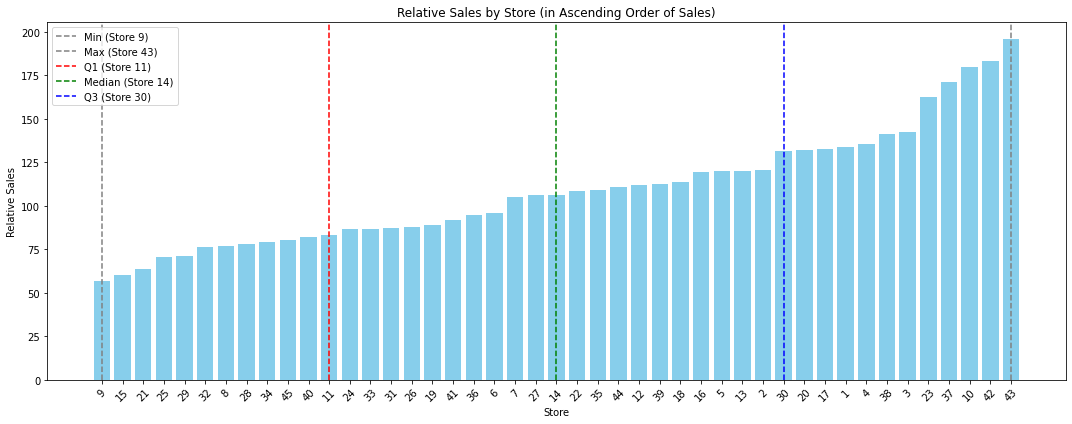

In [213]:
# Sort the dataframe by 'Relative Sales' for the purpose of plotting
sorted_df = store_sales_sum.sort_values(by="Relative Sales", ascending=True)

# Calculate statistics
min_value = sorted_df['Relative Sales'].min()
max_value = sorted_df['Relative Sales'].max()
first_quartile = sorted_df['Relative Sales'].quantile(0.25)
median_value = sorted_df['Relative Sales'].quantile(0.5)
third_quartile = sorted_df['Relative Sales'].quantile(0.75)

# Find the stores corresponding to these statistics
min_store = sorted_df[sorted_df['Relative Sales'] == min_value]['Store'].values[0]
max_store = sorted_df[sorted_df['Relative Sales'] == max_value]['Store'].values[0]
first_quartile_store = sorted_df[sorted_df['Relative Sales'] == first_quartile]['Store'].values[0]
median_store = sorted_df[sorted_df['Relative Sales'] == median_value]['Store'].values[0]
third_quartile_store = sorted_df[sorted_df['Relative Sales'] == third_quartile]['Store'].values[0]

# Create bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(sorted_df['Store'].astype(str), sorted_df['Relative Sales'], color='skyblue')  # Convert store numbers to strings

# Adding labels and title
plt.xlabel('Store')
plt.ylabel('Relative Sales')
plt.title('Relative Sales by Store (in Ascending Order of Sales)')

# Draw vertical lines for the quartiles, min, and max
plt.axvline(x=0, color='grey', linestyle='--', label=f'Min (Store {min_store})')
plt.axvline(x=44, color='grey', linestyle='--', label=f'Max (Store {max_store})')
plt.axvline(x=11, color='r', linestyle='--', label=f'Q1 (Store {first_quartile_store})')
plt.axvline(x=22, color='g', linestyle='--', label=f'Median (Store {median_store})')
plt.axvline(x=33, color='b', linestyle='--', label=f'Q3 (Store {third_quartile_store})')

plt.legend()
plt.xticks(rotation=45)  # Rotate store labels for better readability
plt.tight_layout()

# Show plot
plt.show()

BELOW THE CODE TO ADD TO FINAL CODE

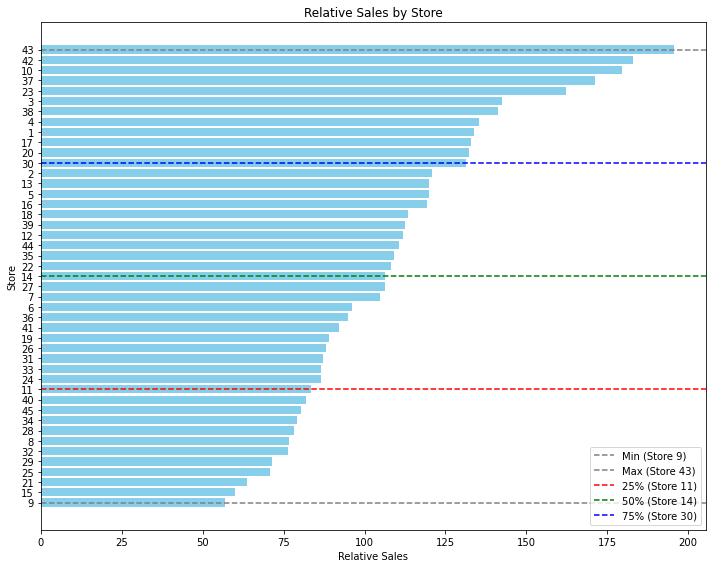

In [214]:
# Sort the dataframe by 'Relative Sales' for the purpose of plotting
sorted_df = store_sales_sum.sort_values(by="Relative Sales", ascending=True)

# Calculate statistics
min_value = sorted_df['Relative Sales'].min()
max_value = sorted_df['Relative Sales'].max()
first_quartile = sorted_df['Relative Sales'].quantile(0.25)
median_value = sorted_df['Relative Sales'].quantile(0.5)
third_quartile = sorted_df['Relative Sales'].quantile(0.75)

# Find the positions (indices) of the stores corresponding to these statistics
min_store_position = sorted_df[sorted_df['Relative Sales'] == min_value].index[0]
max_store_position = sorted_df[sorted_df['Relative Sales'] == max_value].index[0]
first_quartile_store_position = sorted_df[sorted_df['Relative Sales'] == first_quartile].index[0]
median_store_position = sorted_df[sorted_df['Relative Sales'] == median_value].index[0]
third_quartile_store_position = sorted_df[sorted_df['Relative Sales'] == third_quartile].index[0]

# Calculate positions of the statistics in the sorted dataframe
min_store_position = sorted_df.index.get_loc(min_store_position)
max_store_position = sorted_df.index.get_loc(max_store_position)
first_quartile_store_position = sorted_df.index.get_loc(first_quartile_store_position)
median_store_position = sorted_df.index.get_loc(median_store_position)
third_quartile_store_position = sorted_df.index.get_loc(third_quartile_store_position)

# Create horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_df)), sorted_df['Relative Sales'], color='skyblue')

# Draw horizontal lines for the quartiles, min, and max
plt.axhline(y=min_store_position, color='grey', linestyle='--', label=f'Min (Store {int(sorted_df.iloc[min_store_position]["Store"])})')
plt.axhline(y=max_store_position, color='grey', linestyle='--', label=f'Max (Store {int(sorted_df.iloc[max_store_position]["Store"])})')
plt.axhline(y=first_quartile_store_position, color='r', linestyle='--', label=f'25% (Store {int(sorted_df.iloc[first_quartile_store_position]["Store"])})')
plt.axhline(y=median_store_position, color='g', linestyle='--', label=f'50% (Store {int(sorted_df.iloc[median_store_position]["Store"])})')
plt.axhline(y=third_quartile_store_position, color='b', linestyle='--', label=f'75% (Store {int(sorted_df.iloc[third_quartile_store_position]["Store"])})')

# Adding labels and title
plt.xlabel('Relative Sales')
plt.ylabel('Store')
plt.title('Relative Sales by Store')
plt.yticks(range(len(sorted_df)), [int(x) for x in sorted_df['Store']])  # Set store numbers as y-tick labels, converted to integers
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
